# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [2]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=",", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [3]:
data.shape

(10560, 11)

In [4]:
data['alpha_deg'].unique()

array([  0,   5,  10,  15,  30,  45,  60,  70,  80,  90, 100, 110, 120,
       150, 180, 210, 240, 270, 300, 330], dtype=int64)

In [5]:
removed_angles = [80]
data_removed = data[~data['alpha_deg'].isin(removed_angles)]
data_angles = data[data['alpha_deg'].isin(removed_angles)]

In [6]:
data_angles

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
4224,ND3.0X80X0.0,0.228193,-0.001386,3.000027,80,-0.001419,1.778119,0.259774,1.855766,0.384328,0.077648
4225,ND3.0X80X0.2,0.228193,0.537948,3.000028,80,-0.001319,1.781882,0.257564,1.854920,0.381181,0.073038
4226,ND3.0X80X0.4,0.228193,1.077281,3.000027,80,-0.001103,1.796328,0.261392,1.858117,0.383801,0.061789
4227,ND3.0X80X0.6,0.228193,1.616614,3.000027,80,-0.000930,1.823724,0.276801,1.883902,0.379610,0.060178
4228,ND3.0X80X0.8,0.228193,2.155947,3.000028,80,-0.000782,1.839798,0.294237,1.911315,0.368504,0.071517
...,...,...,...,...,...,...,...,...,...,...,...
4747,ND9.5X80X90d3.4,-8.941247,-0.001884,9.498230,80,-0.000074,1.896021,0.288940,1.901224,0.382553,0.005203
4748,ND9.5X80X90d3.6,-9.480581,-0.001884,9.498124,80,-0.000070,1.896311,0.289699,1.901270,0.381851,0.004959
4749,ND9.5X80X90d3.8,-10.019914,-0.001884,9.498018,80,-0.000065,1.896595,0.290442,1.901314,0.381163,0.004719
4750,ND9.5X80X90d4.0,-10.559247,-0.001884,9.497913,80,-0.000061,1.896873,0.291136,1.901354,0.380523,0.004482


Input features and output variable selection

In [7]:
X_train = data_removed[["Xshift","Yshift","Zshift","alpha_deg"]].values
y_train = data_removed["CPL"].values*1000 #mev multiplication
X_test = data_angles[["Xshift","Yshift","Zshift","alpha_deg"]].values
y_test = data_angles["CPL"].values*1000 #mev multiplication

In [8]:
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

Splitting of the data into train set and test set

Scaling of input features

In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [11]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [13]:
num_epochs = 500

Neural Network training

In [14]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
283/283 [==============================] - 2s 4ms/step - loss: 1.3969 - val_loss: 1.2035
Epoch 2/500
283/283 [==============================] - 1s 3ms/step - loss: 1.1436 - val_loss: 1.1028
Epoch 3/500
283/283 [==============================] - 1s 3ms/step - loss: 1.0935 - val_loss: 1.1118
Epoch 4/500
283/283 [==============================] - 1s 3ms/step - loss: 1.0506 - val_loss: 1.0149
Epoch 5/500
283/283 [==============================] - 1s 3ms/step - loss: 0.9644 - val_loss: 0.9315
Epoch 6/500
283/283 [==============================] - 1s 3ms/step - loss: 1.0214 - val_loss: 0.9040
Epoch 7/500
283/283 [==============================] - 1s 3ms/step - loss: 0.9184 - val_loss: 0.8994
Epoch 8/500
283/283 [==============================] - 1s 3ms/step - loss: 0.8938 - val_loss: 0.8735
Epoch 9/500
283/283 [==============================] - 1s 5ms/step - loss: 0.8837 - val_loss: 0.8356
Epoch 10/500
283/283 [==============================] - 1s 4ms/step - loss: 0.8651 - val_lo

# Model Evaluation

In [15]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0146


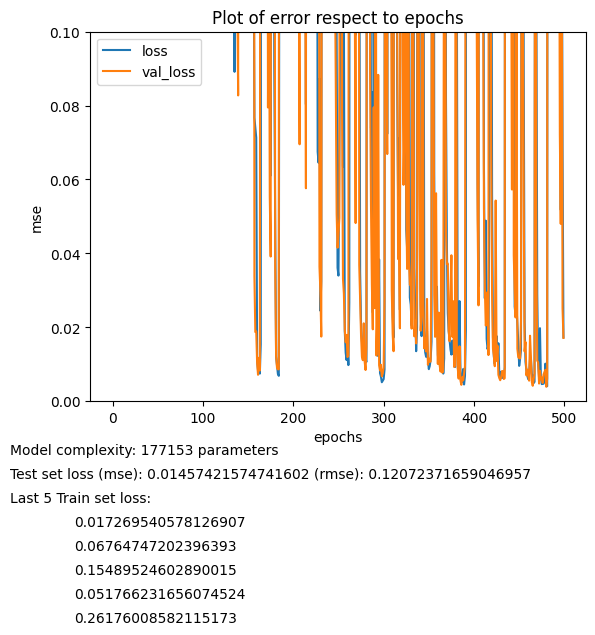

In [16]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [17]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [18]:
#model.predict(emp_test)

# Scatter plot

In [19]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [20]:
pred = predictions(X_test)

In [21]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.014574229076148571

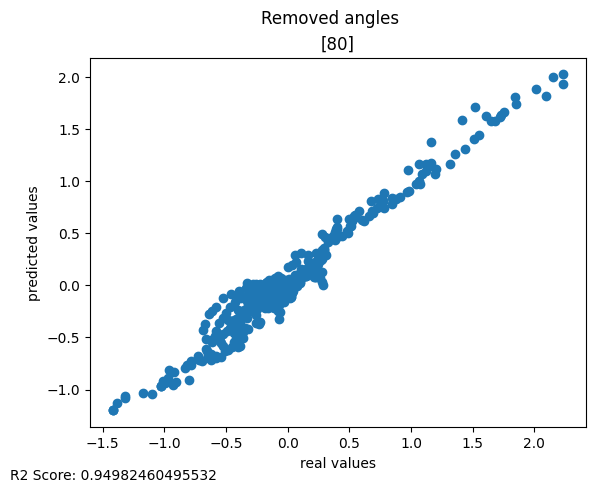

In [22]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.suptitle("Removed angles")
plt.title(removed_angles)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [23]:
#model.save('CPL_meV.h5')